In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import os
import re
from sklearn import model_selection, svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, average_precision_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_curve, roc_auc_score

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Conv1D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import MaxPooling1D
from keras.layers import Activation
from keras import optimizers
from keras.layers import Conv1D
from keras.optimizers import SGD #Stochastic Gradient Descent Optimizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding

from keras.applications import inception_v3

import livelossplot
from livelossplot import PlotLossesKeras
plot_losses = livelossplot.PlotLossesKeras()

import hdf5storage

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

Using TensorFlow backend.


In [2]:
#Path To Image Files
data_path="E:/Brain Tumor/Combined Data/"
mat_files=[pos_img for pos_img in os.listdir(data_path) if pos_img.endswith('.mat')]
print(len(mat_files))

3064


In [3]:
mat_files

['1.mat',
 '10.mat',
 '100.mat',
 '1000.mat',
 '1001.mat',
 '1002.mat',
 '1003.mat',
 '1004.mat',
 '1005.mat',
 '1006.mat',
 '1007.mat',
 '1008.mat',
 '1009.mat',
 '101.mat',
 '1010.mat',
 '1011.mat',
 '1012.mat',
 '1013.mat',
 '1014.mat',
 '1015.mat',
 '1016.mat',
 '1017.mat',
 '1018.mat',
 '1019.mat',
 '102.mat',
 '1020.mat',
 '1021.mat',
 '1022.mat',
 '1023.mat',
 '1024.mat',
 '1025.mat',
 '1026.mat',
 '1027.mat',
 '1028.mat',
 '1029.mat',
 '103.mat',
 '1030.mat',
 '1031.mat',
 '1032.mat',
 '1033.mat',
 '1034.mat',
 '1035.mat',
 '1036.mat',
 '1037.mat',
 '1038.mat',
 '1039.mat',
 '104.mat',
 '1040.mat',
 '1041.mat',
 '1042.mat',
 '1043.mat',
 '1044.mat',
 '1045.mat',
 '1046.mat',
 '1047.mat',
 '1048.mat',
 '1049.mat',
 '105.mat',
 '1050.mat',
 '1051.mat',
 '1052.mat',
 '1053.mat',
 '1054.mat',
 '1055.mat',
 '1056.mat',
 '1057.mat',
 '1058.mat',
 '1059.mat',
 '106.mat',
 '1060.mat',
 '1061.mat',
 '1062.mat',
 '1063.mat',
 '1064.mat',
 '1065.mat',
 '1066.mat',
 '1067.mat',
 '1068.mat'

In [4]:
%%time
features=[]
labels=[]
mask_region_array=[]
for i in mat_files:
    mat_path=os.path.join(data_path,i)
    data_file=hdf5storage.loadmat(mat_path)
    
    label=data_file['cjdata'][0][0][0][0]
    id_val=data_file['cjdata'][0][1][0][0]
    data=data_file['cjdata'][0][2]
    #data=np.resize(data,(128, 128))
    mask_border=data_file['cjdata'][0][3] #Only Tumor Border
    mask_region=data_file['cjdata'][0][4] #Only Tumor Region
    
    features.append(np.asarray(data))
    labels.append(label)
    mask_region_array.append(mask_region)

Wall time: 29.5 s


In [5]:
features=np.asarray(features)
labels=np.asarray(labels)

In [6]:
print(features.shape)
print(labels.shape)

(3064,)
(3064,)


In [7]:
classes=np.unique(labels)
print("The Classes Are ",classes)
print("The Number of Classes Are", len(classes))

The Classes Are  [1. 2. 3.]
The Number of Classes Are 3


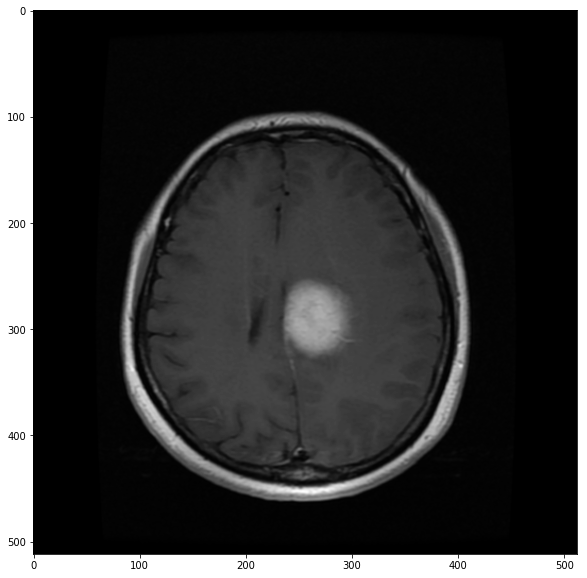

In [8]:
image_val=1 #Change To See Different Images
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(features[image_val], interpolation='gaussian', cmap='gray')
plt.show()

In [9]:
#Data Shape Fix
nRows,nCols = features.shape[1:]
features = features.reshape(features.shape[0], nRows, nCols,1)
input_shape=(nRows,nCols,1)
print("Shape of The Complete Data Set is "+ str(features.shape))

Shape of The Complete Data Set is (3064, 128, 128, 1)


In [10]:
# Change to float datatype
features = features.astype('float32')
labels = labels.reshape(labels.shape[0],1)

In [11]:
#One Hot Encoding
#Converting the Labels to be Categorical
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
labels=enc.fit_transform(labels).toarray()

In [12]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state =9, stratify=labels)

In [13]:
print("The Shape of Train Data is "+ str(train_features.shape))
print("The Shape of Test Data is "+str(test_features.shape))
print("The Shape of Train Label is "+ str(train_labels.shape))
print("The Shape of Test Label is "+str(test_labels.shape))

The Shape of Train Data is (2144, 128, 128, 1)
The Shape of Test Data is (920, 128, 128, 1)
The Shape of Train Label is (2144, 3)
The Shape of Test Label is (920, 3)


# Normal CNN Learning

In [13]:
import livelossplot
from livelossplot import PlotLossesKeras
plot_losses = livelossplot.PlotLossesKeras()

In [14]:
def create_model():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))
    
    return model

In [15]:
model=create_model()
model.summary()

batch_size = 50
epochs = 50

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 32)        18464     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
__________

In [18]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

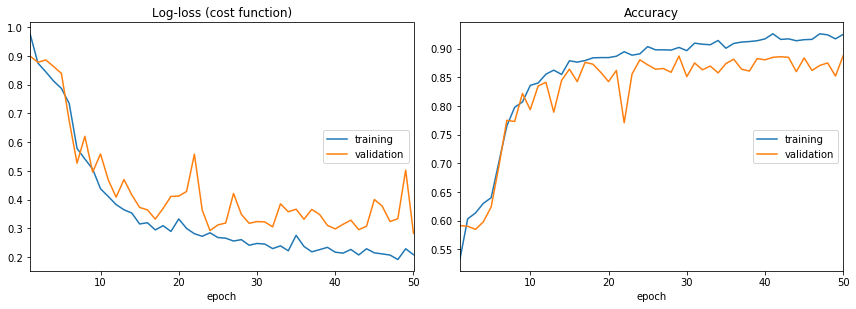

Log-loss (cost function):
training   (min:    0.192, max:    0.977, cur:    0.208)
validation (min:    0.283, max:    0.899, cur:    0.283)

Accuracy:
training   (min:    0.532, max:    0.926, cur:    0.925)
validation (min:    0.585, max:    0.888, cur:    0.888)


In [19]:
history = model.fit(train_features, 
                     train_labels, 
                     batch_size=batch_size,
                     epochs=epochs, verbose=1, 
                     validation_data=(test_features, test_labels),
                     callbacks=[plot_losses])

In [20]:
scores = model.evaluate(test_features, test_labels)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

920/920 [==============================] - 1s 852us/step

acc: 88.80%


In [21]:
predictions=model.predict_classes(test_features)
test_labels=np.argmax(test_labels, axis=1)
print(accuracy_score(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))
print(classification_report(test_labels, predictions))

0.8880434782608696
[[177  28   8]
 [ 53 369   6]
 [  3   5 271]]
             precision    recall  f1-score   support

          0       0.76      0.83      0.79       213
          1       0.92      0.86      0.89       428
          2       0.95      0.97      0.96       279

avg / total       0.89      0.89      0.89       920

